In [2]:
import warnings
warnings.filterwarnings(action='ignore')
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from scipy.stats import loguniform
from scipy.stats import randint
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/My Drive/dfMD_log_MM.csv'
dfMD_log_MM = pd.read_csv(filepath)

dfMD_log_MM.head

Mounted at /content/drive


<bound method NDFrame.head of          Name class1 class2 class3 class4  BOD    DO   COD    T-N    T-P  ...  \
0       M1(3)     M1      M    Mar  M_Mar  1.0  12.8   2.8  2.278  0.013  ...   
1       M1(4)     M1      M    Apr  M_Apr  1.2  11.3   3.2  2.342  0.006  ...   
2       M1(5)     M1      M    May  M_May  1.2  10.7   3.2  1.326  0.004  ...   
3       M1(6)     M1      M    Jun  M_Jun  1.2   9.7   3.1  1.670  0.008  ...   
4       M1(7)     M1      M    Jul  M_Jul  1.2   9.3   3.3  1.926  0.014  ...   
..        ...    ...    ...    ...    ...  ...   ...   ...    ...    ...  ...   
209  D5-1(10)   D5-1      D    Oct  D_Oct  7.4  13.2  16.5  3.998  0.148  ...   
210  D5-1(11)   D5-1      D    Nov  D_Nov  7.6  17.0  14.9  6.673  0.130  ...   
211  D5-1(12)   D5-1      D    Dec  D_Dec  5.2   9.3  14.4  6.421  0.202  ...   
212   D5-1(1)   D5-1      D    Jan  D_Jan  4.5  17.8  10.6  6.408  0.041  ...   
213   D5-1(2)   D5-1      D    Feb  D_Feb  5.5  15.1  13.1  5.710  0.061  ...  

In [33]:
import warnings
warnings.filterwarnings(action='ignore')
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from scipy.stats import loguniform
from scipy.stats import randint
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/My Drive/dfMD_log_MM.csv'
dfMD_log_MM = pd.read_csv(filepath)

dfMD_log_MM_input=dfMD_log_MM.iloc[:,13:].to_numpy()
dfMD_log_MM_target=dfMD_log_MM['class2'].to_numpy()


from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(dfMD_log_MM_input, dfMD_log_MM_target, shuffle=True, random_state=42)

from sklearn.linear_model import LogisticRegression
lr1=LogisticRegression(C=82.44312190905076, max_iter=604, penalty='l1', solver='liblinear', random_state=42)
lr1.fit(train_input, train_target)
print("Train Accuracy:", lr1.score(train_input, train_target))
print("Test Accuracy:", lr1.score(test_input, test_target))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Accuracy: 1.0
Test Accuracy: 0.9074074074074074


<Axes: >

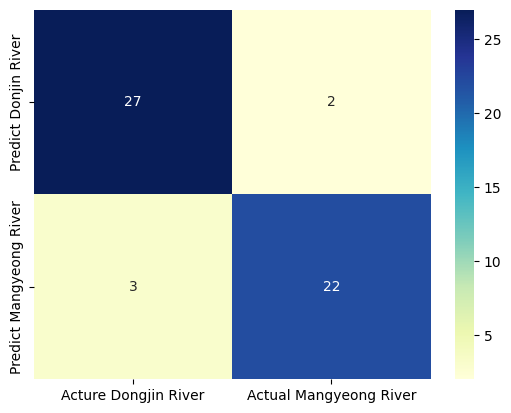

In [34]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred=lr1.fit(train_input, train_target).predict(test_input)
cm=confusion_matrix(test_target, y_pred)
cm_matrix=pd.DataFrame(data=cm, columns=['Acture Dongjin River','Actual Mangyeong River'], index=['Predict Donjin River','Predict Mangyeong River'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [37]:
import warnings
warnings.filterwarnings(action='ignore')
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from scipy.stats import loguniform
from scipy.stats import randint
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/My Drive/dfMD_log_MM.csv'
dfMD_log_MM = pd.read_csv(filepath)

dfMD_log_MM_input=dfMD_log_MM.iloc[:,13:].to_numpy()
dfMD_log_MM_target=dfMD_log_MM['class1'].to_numpy()


from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(dfMD_log_MM_input, dfMD_log_MM_target, shuffle=True, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression
lr2=LogisticRegression(C=82.44312190905076, max_iter=604, penalty='l1', solver='liblinear', random_state=42)
lr2.fit(train_input, train_target)
print("Train Accuracy:", lr2.score(train_input, train_target))
print("Test Accuracy:", lr2.score(test_input, test_target))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Accuracy: 1.0
Test Accuracy: 0.36923076923076925


<Axes: >

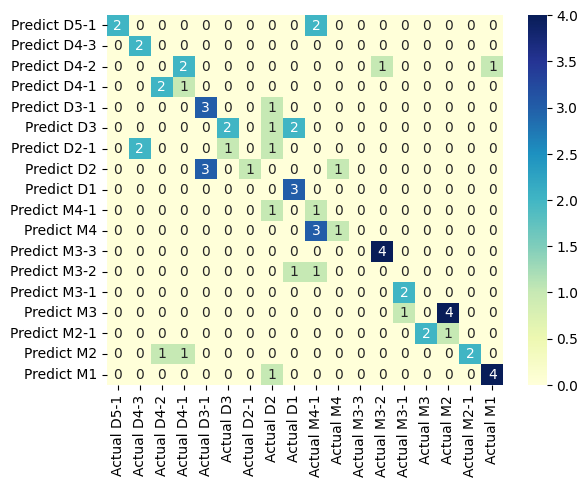

In [40]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred=lr2.fit(train_input, train_target).predict(test_input)
cm=confusion_matrix(test_target, y_pred)
cm_matrix=pd.DataFrame(data=cm, columns=['Actual D5-1','Actual D4-3','Actual D4-2', 'Actual D4-1','Actual D3-1','Actual D3','Actual D2-1','Actual D2','Actual D1','Actual M4-1','Actual M4','Actual M3-3','Actual M3-2','Actual M3-1','Actual M3', 'Actual M2','Actual M2-1','Actual M1'], 
                                         index=['Predict D5-1', 'Predict D4-3', 'Predict D4-2','Predict D4-1','Predict D3-1','Predict D3','Predict D2-1','Predict D2','Predict D1','Predict M4-1','Predict M4','Predict M3-3','Predict M3-2','Predict M3-1','Predict M3','Predict M2-1','Predict M2','Predict M1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [19]:
import warnings
warnings.filterwarnings(action='ignore')
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from scipy.stats import loguniform
from scipy.stats import randint
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/My Drive/dfMD_log_MM.csv'
dfMD_log_MM = pd.read_csv(filepath)

dfMD_log_MM_input=dfMD_log_MM.iloc[:,13:].to_numpy()
dfMD_log_MM_target=dfMD_log_MM['class3'].to_numpy()


from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(dfMD_log_MM_input, dfMD_log_MM_target, shuffle=True, random_state=42)

from sklearn.linear_model import LogisticRegression
lr3=LogisticRegression(C=82.44312190905076, max_iter=604, penalty='l1', solver='liblinear', random_state=42)
lr3.fit(train_input, train_target)
print("Train Accuracy:", lr3.score(train_input, train_target))
print("Test Accuracy:", lr3.score(test_input, test_target))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Accuracy: 1.0
Test Accuracy: 0.9629629629629629


In [31]:
import warnings
warnings.filterwarnings(action='ignore')
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from scipy.stats import loguniform
from scipy.stats import randint
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/My Drive/input_MDM.csv'
dfMD = pd.read_csv(filepath)


# Log transform the data
dfMD[dfMD.columns[14:]] = np.log(dfMD[dfMD.columns[14:]])
dfMD.to_csv("dfMD_log.csv", index=False)
dfMD_log = pd.read_csv("dfMD_log.csv")

from sklearn.preprocessing import MinMaxScaler
# 4. MinMax transformation
scaler = MinMaxScaler()
dfMD_log[dfMD_log.columns[14:]] = scaler.fit_transform(dfMD_log[dfMD_log.columns[14:]])


# Save the transformed data to a new .csv file
dfMD_log.to_csv("dfMD_log_MM.csv", index=False)
dfMD_log_MM = pd.read_csv("dfMD_log_MM.csv")

dfMD_log_MM_input=dfMD_log_MM.iloc[:,14:].to_numpy()
dfMD_log_MM_target=dfMD_log_MM['class5'].to_numpy()


from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(dfMD_log_MM_input, dfMD_log_MM_target, shuffle=True, random_state=42)

from sklearn.linear_model import LogisticRegression
lr3=LogisticRegression(C=82.44312190905076, max_iter=604, penalty='l1', solver='liblinear', random_state=42)
lr3.fit(train_input, train_target)
print("Train Accuracy:", lr3.score(train_input, train_target))
print("Test Accuracy:", lr3.score(test_input, test_target))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Accuracy: 1.0
Test Accuracy: 1.0


<Axes: >

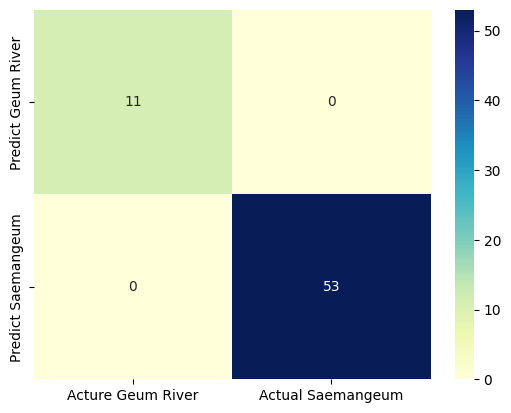

In [32]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred=lr3.fit(train_input, train_target).predict(test_input)
cm=confusion_matrix(test_target, y_pred)
cm_matrix=pd.DataFrame(data=cm, columns=['Acture Geum River','Actual Saemangeum'], index=['Predict Geum River','Predict Saemangeum'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [35]:
import warnings
warnings.filterwarnings(action='ignore')
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from scipy.stats import loguniform
from scipy.stats import randint
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/My Drive/dfMD_log_MM.csv'
dfMD_log_MM = pd.read_csv(filepath)

dfMD_log_MM_input=dfMD_log_MM.iloc[:,13:].to_numpy()
dfMD_log_MM_target=dfMD_log_MM['class3'].to_numpy()


from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(dfMD_log_MM_input, dfMD_log_MM_target, shuffle=True, random_state=42)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=82.44312190905076, max_iter=604, penalty='l1', solver='liblinear', random_state=42)
lr.fit(train_input, train_target)
print("Train Accuracy:", lr.score(train_input, train_target))
print("Test Accuracy:", lr.score(test_input, test_target))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Accuracy: 1.0
Test Accuracy: 0.9629629629629629


<Axes: >

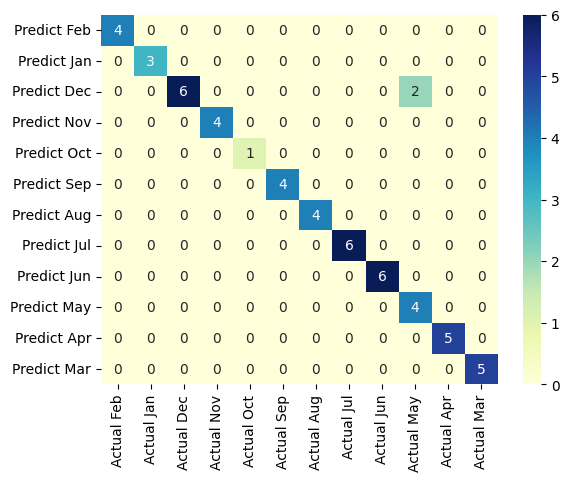

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred=lr3.fit(train_input, train_target).predict(test_input)
cm=confusion_matrix(test_target, y_pred)
cm_matrix=pd.DataFrame(data=cm, columns=['Actual Feb','Actual Jan','Actual Dec','Actual Nov','Actual Oct','Actual Sep','Actual Aug','Actual Jul','Actual Jun','Actual May','Actual Apr','Actual Mar'], 
                                         index=['Predict Feb','Predict Jan','Predict Dec','Predict Nov','Predict Oct','Predict Sep','Predict Aug','Predict Jul','Predict Jun','Predict May','Predict Apr','Predict Mar'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [44]:
import warnings
warnings.filterwarnings(action='ignore')
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from scipy.stats import loguniform
from scipy.stats import randint
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/My Drive/dfMD_log_MM.csv'
dfMD_log_MM = pd.read_csv(filepath)

dfMD_log_MM_input=dfMD_log_MM.iloc[:,13:].to_numpy()
dfMD_log_MM_target=dfMD_log_MM['class4'].to_numpy()


from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(dfMD_log_MM_input, dfMD_log_MM_target, shuffle=True, random_state=42)

from sklearn.linear_model import LogisticRegression
lr4=LogisticRegression(C=82.44312190905076, max_iter=604, penalty='l1', solver='liblinear', random_state=42)
lr4.fit(train_input, train_target)
print("Train Accuracy:", lr4.score(train_input, train_target))
print("Test Accuracy:", lr4.score(test_input, test_target))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Accuracy: 1.0
Test Accuracy: 0.6666666666666666


In [47]:
print(np.unique(test_target))

['D_Apr' 'D_Aug' 'D_Dec' 'D_Feb' 'D_Jan' 'D_Jul' 'D_Jun' 'D_Mar' 'D_May'
 'D_Nov' 'D_Oct' 'D_Sep' 'M_Apr' 'M_Aug' 'M_Dec' 'M_Feb' 'M_Jul' 'M_Jun'
 'M_Mar' 'M_May' 'M_Nov' 'M_Oct' 'M_Sep']


<Axes: >

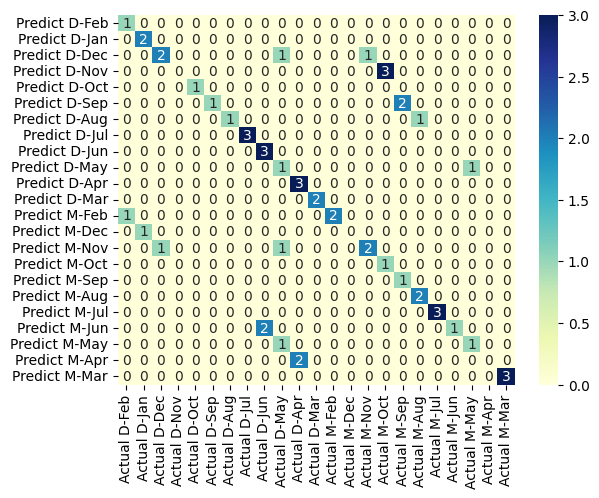

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred=lr4.fit(train_input, train_target).predict(test_input)
cm=confusion_matrix(test_target, y_pred)
cm_matrix=pd.DataFrame(data=cm, columns=['Actual D-Feb','Actual D-Jan','Actual D-Dec','Actual D-Nov','Actual D-Oct','Actual D-Sep','Actual D-Aug','Actual D-Jul','Actual D-Jun','Actual D-May','Actual D-Apr','Actual D-Mar','Actual M-Feb','Actual M-Dec','Actual M-Nov','Actual M-Oct','Actual M-Sep','Actual M-Aug','Actual M-Jul','Actual M-Jun','Actual M-May','Actual M-Apr','Actual M-Mar'], 
                                         index=['Predict D-Feb','Predict D-Jan','Predict D-Dec','Predict D-Nov','Predict D-Oct','Predict D-Sep','Predict D-Aug','Predict D-Jul','Predict D-Jun','Predict D-May','Predict D-Apr','Predict D-Mar','Predict M-Feb','Predict M-Dec','Predict M-Nov','Predict M-Oct','Predict M-Sep','Predict M-Aug','Predict M-Jul','Predict M-Jun','Predict M-May','Predict M-Apr','Predict M-Mar'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')